Computes optimal descent vectors using Newton method for minimizing different singular values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def obj_func(m, index):
    u, s, vh = np.linalg.svd(m)

    return s[index]

def comp_grad(m, boolMask, obj_func, index, n):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3

    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff, index) - obj_func(m - diff, index))/(2*epsilon))

    return grad

In [11]:
def comp_hessian(m, boolMask, of, index, n):
    """ Computes hessian (only diagonal) """
    vector = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                vector.append(m[i,j])

    q = len(vector)

    epsilon = 1e-3
    hessian = np.zeros([q, q])

    # fill in the diagonal first
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:

                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian[count,count] = (of(m + diff, index) + of(m - diff, index) - 2*of(m, index))/epsilon**2

                count = count + 1
                
    # now fill in off-diagonals
    count1 = 0
    for i1 in range(n):
        for j1 in range(n):
            if boolMask[i1,j1]: # found one
                diff1 = np.zeros([n,n])
                diff1[i1,j1] = epsilon

                count2 = 0
                for i2 in range(n):
                    for j2 in range(n):
                        if boolMask[i2,j2]: # found another one
                            diff2 = np.zeros([n,n])
                            diff2[i2,j2] = epsilon

                            if count1 != count2: # doing only off-diagonal ones
                                hessian[count1,count2] = (of(m + diff1 + diff2, index) + of(m - diff1 - diff2, index)
                                                         - of(m + diff1 - diff2, index) - of(m - diff1 + diff2, index))/(2*epsilon)**2

                            count2 = count2 + 1

                count1 = count1 + 1

    return hessian

In [20]:
def anal(p,rank,n):
    # Define a matrix, mask and noise
    U = np.random.randn(n, rank)
    V = np.random.randn(n, rank)
    original = np.dot(U, V.T)
    mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])
    
    boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
    
    vectors = []

    for index in range(n):
        vectors.append(np.dot(np.linalg.inv(comp_hessian(original, boolMask, obj_func, index, n)),
                              comp_grad(original, boolMask, obj_func, index, n)))
        
    distances = np.zeros([n,n])

    for i in range(n):
        for j in range(n):
            distances[i,j] = np.linalg.norm(vectors[i] - vectors[j])
    
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    
    # lets replace diagonal with something that log can handle
    for i in range(len(distances)):
        distances[i,i] = distances[0,1]

    plt.subplot(1,2,1)
    plt.imshow(np.log(distances))
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("log of distances")
    
    # compute cosine matrix (can be converted to angle matrix)
    cosine_matrix = np.zeros([n, n])

    for i in range(n):
        for j in range(n):
            a = vectors[i]
            b = vectors[j]
            cosine_matrix[i,j] = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    
    plt.subplot(1,2,2)
    plt.imshow(np.arccos(cosine_matrix * (1 - 1e-10))/np.pi*180)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title("angles (in degrees)")

## Different ranks

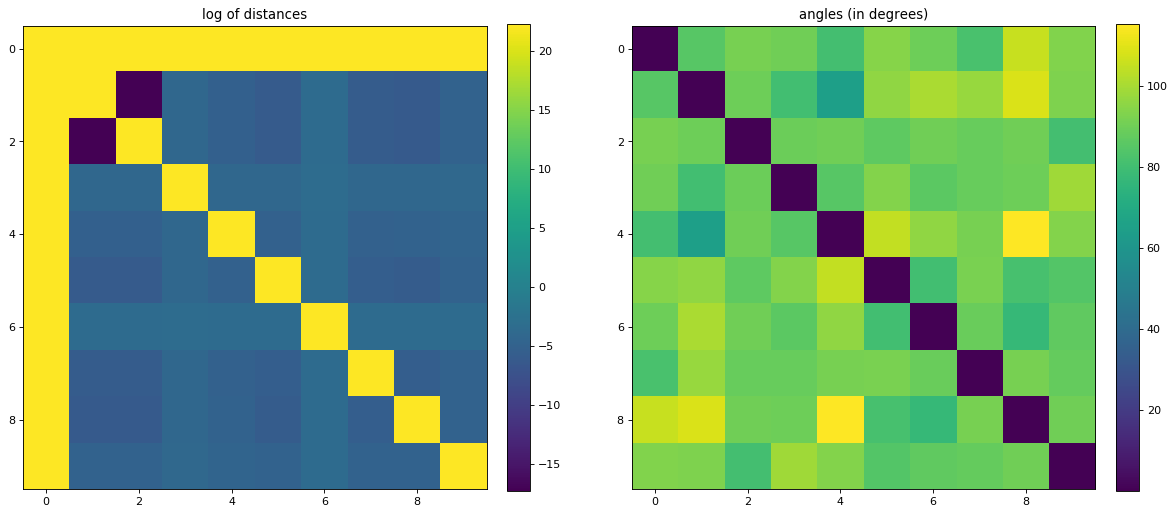

In [21]:
anal(0.2,1,10)

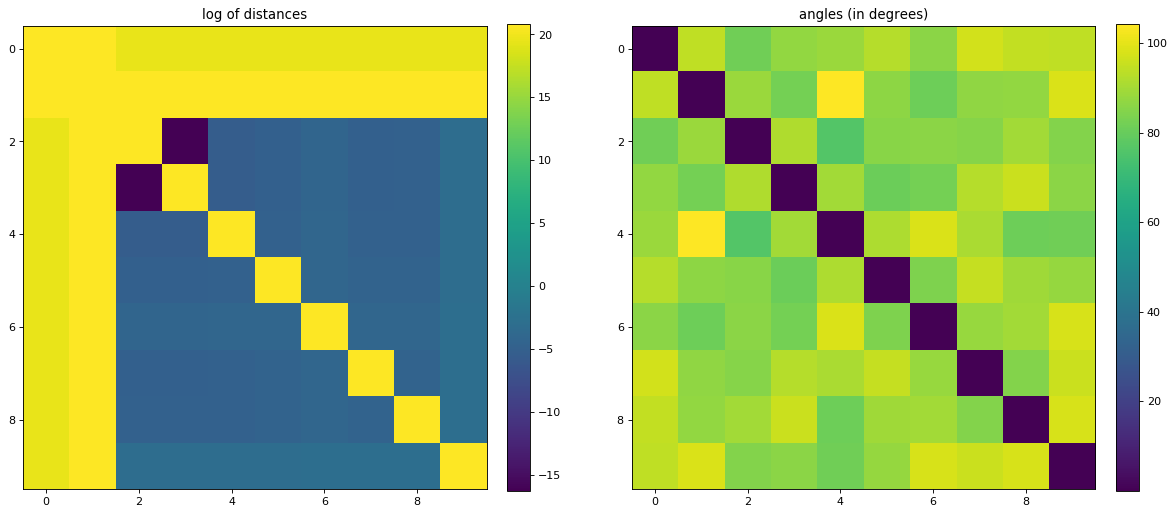

In [22]:
anal(0.2,2,10)

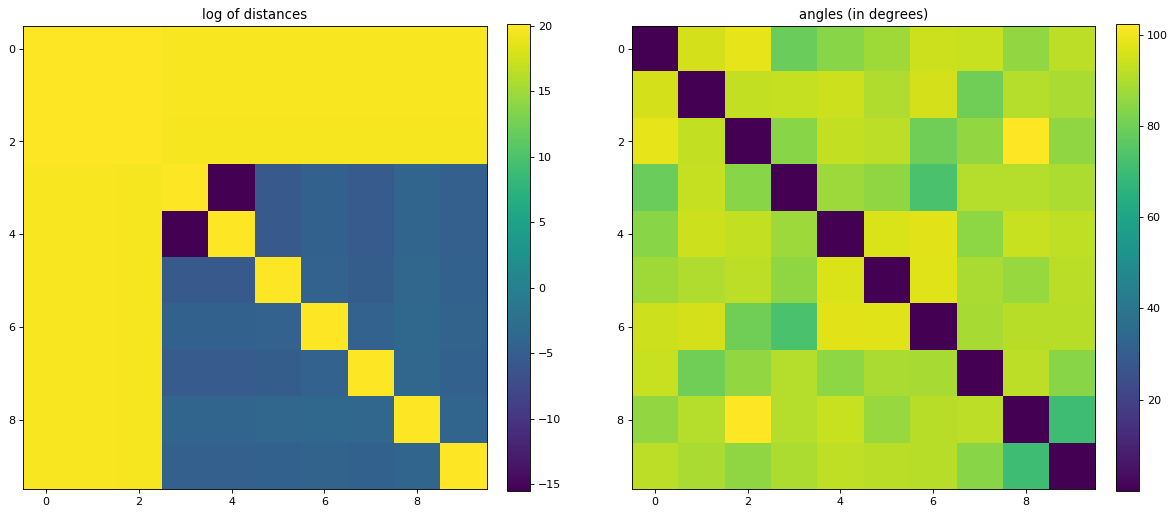

In [26]:
anal(0.2,3,10)

## Different densities

p tells how much is known

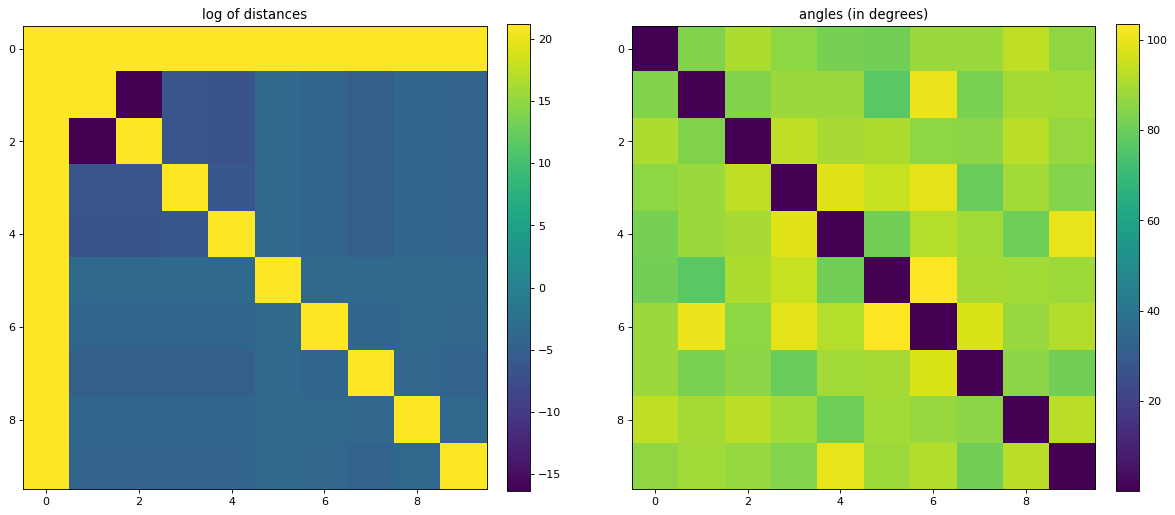

In [23]:
anal(0.1,1,10)

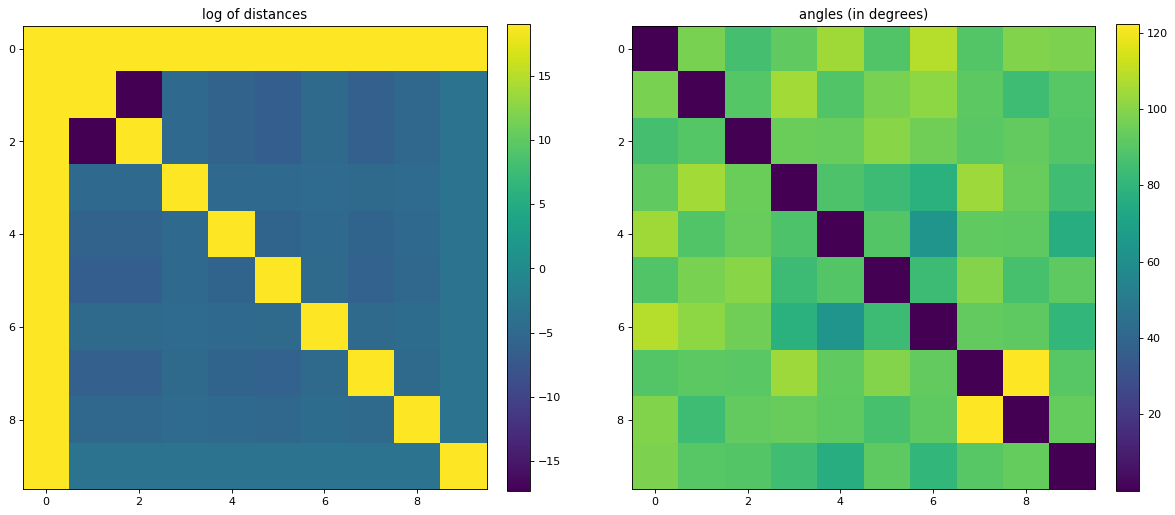

In [24]:
anal(0.5,1,10)

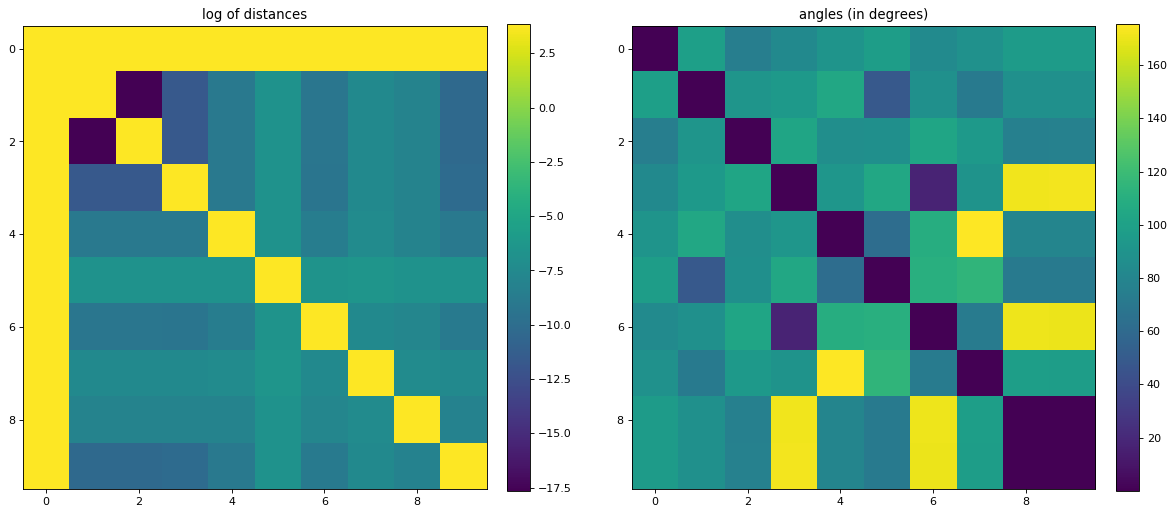

In [25]:
anal(0.9,1,10)

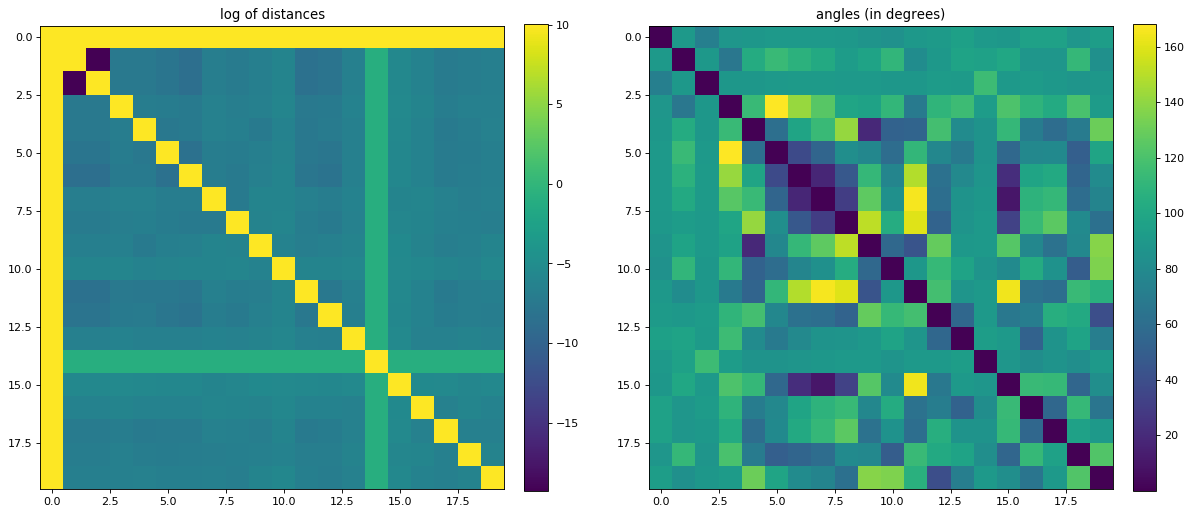

In [44]:
anal(0.9,1,20)